Data Exploration and Visualization
========================

In [ ]:
# Install missing packages
%pip install pandas numpy matplotlib seaborn scikit-learn

#imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 3.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.5 MB 3.7 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.5 MB 3.7 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.5 MB 3.6 MB/s eta 0:00:03
   ------------ --------------------------- 3.7/11.5 MB 3.6 MB/s eta 0:00:03
   --------------- ------------------------ 4.5/11.5 MB 3.6 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.5 MB 3.6 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.5 MB 3.6 MB/s eta 0:00:02
   ----------------------- ---------------- 6.8/11.5 MB 3.6 MB/s eta 0:00:02
   -------------------------- ------------- 7.6/11.5 MB 3.6 MB/s eta 0:00:02
   ----------------------------- ---------- 8.4/11.5 MB 3.6 MB/s eta 0:00:01
   ------------

In [ ]:
# configuration for plotting

sns.set_theme(style="darkgrid", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)


In [ ]:
# Load the dataset

df = pd.read_csv("healthcare-dataset-stroke-data (2).csv")

In [10]:
# Display the first few rows of the dataset
print(f"Dataset shape: {df.shape}")
display(df.head())

Dataset shape: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
# check for data types and information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [12]:
# Statistics summary of the dataset
display(df.describe())

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [14]:
# Check class distribution (stroke vs. no stroke)
print("\nStroke distribution:")
print(df['stroke'].value_counts())
print(f"Percentage of stroke cases: {df['stroke'].mean()*100:.2f}%")


Stroke distribution:
stroke
0    4861
1     249
Name: count, dtype: int64
Percentage of stroke cases: 4.87%


Feature Distribution Visualization
========================

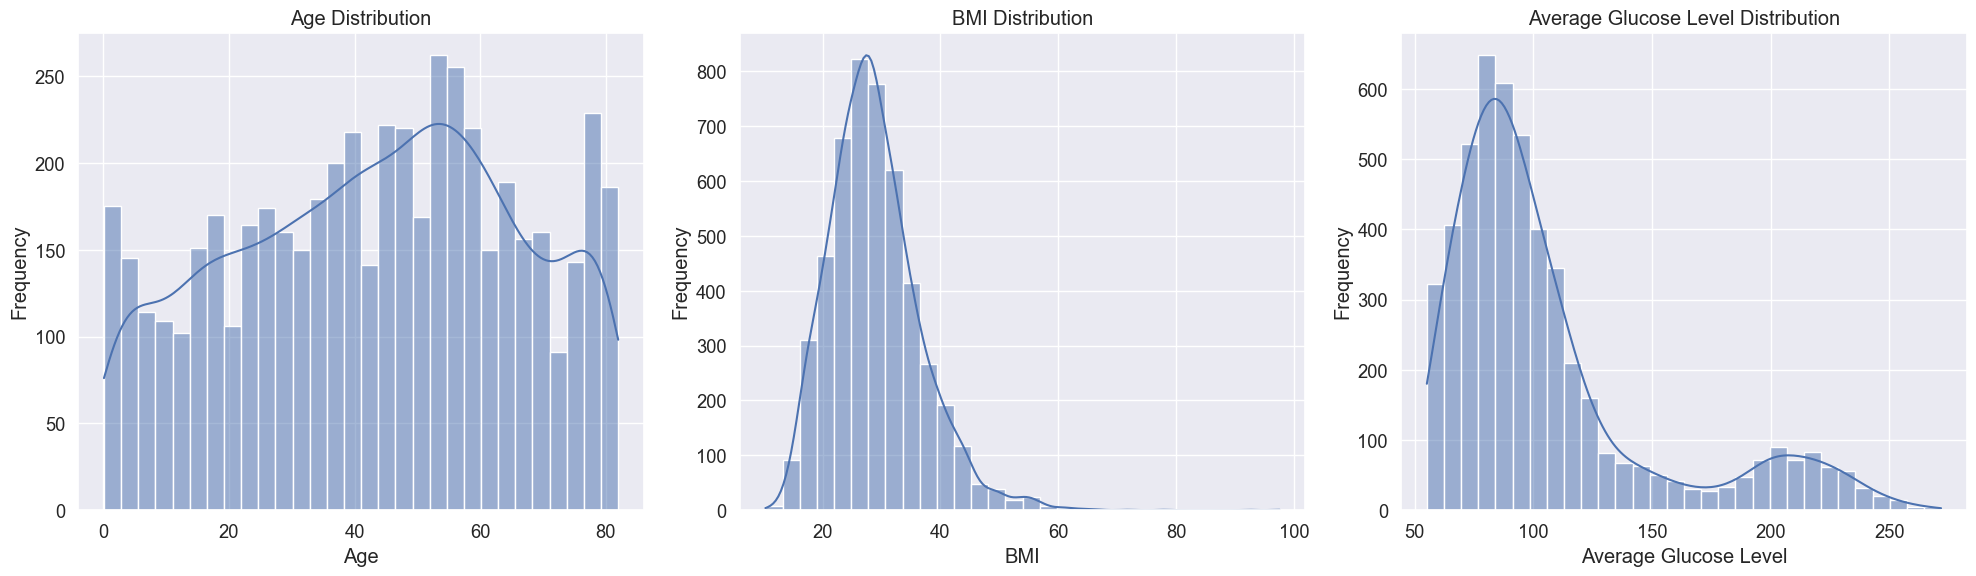

In [26]:
# Visualize the distribution of numerical features

fig, axes = plt.subplots(1, 3, figsize=(20, 6))


# Age distribution
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# bmi distribution
sns.histplot(df['bmi'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('BMI Distribution')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Frequency')

# Glucose level distribution
sns.histplot(df['avg_glucose_level'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Average Glucose Level Distribution')
axes[2].set_xlabel('Average Glucose Level')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


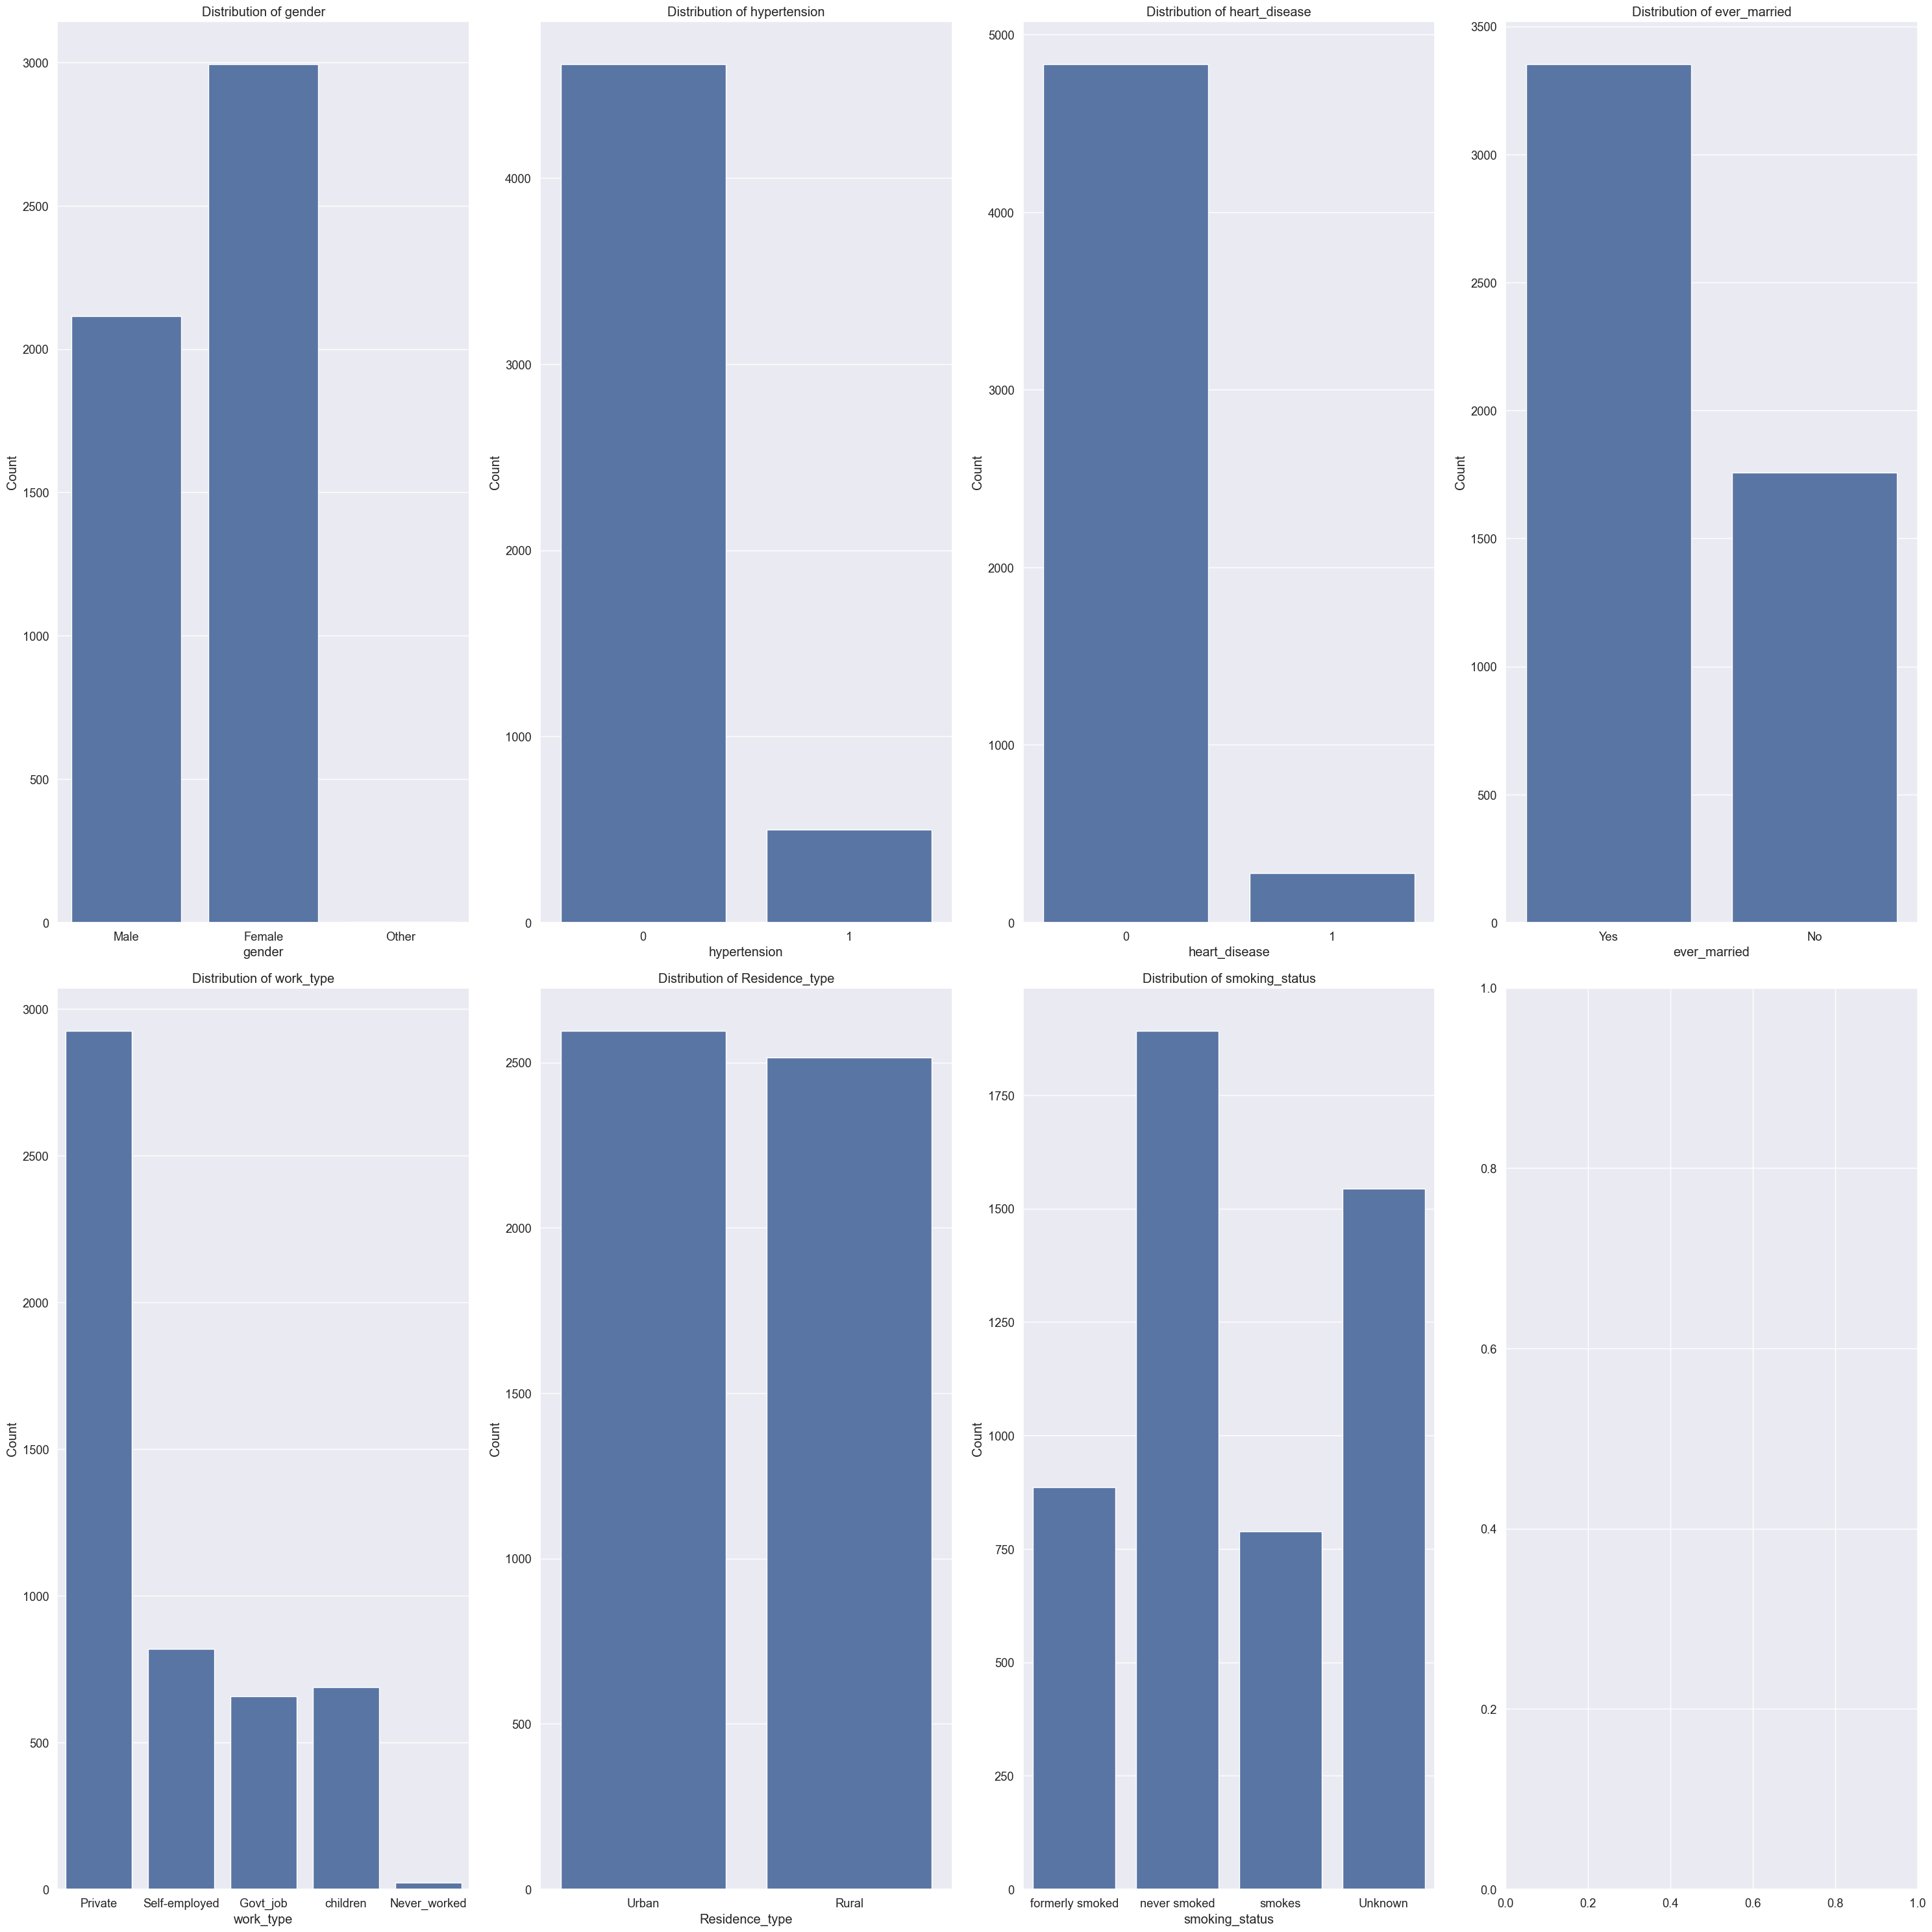

In [29]:
# Visualize the distribution of categorical features
# 2. Distribution of categorical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                       'work_type', 'Residence_type', 'smoking_status']

fig, axes = plt.subplots(2, 4, figsize=(30, 30))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()



Feature Relationships with Stroke Outcome
========================

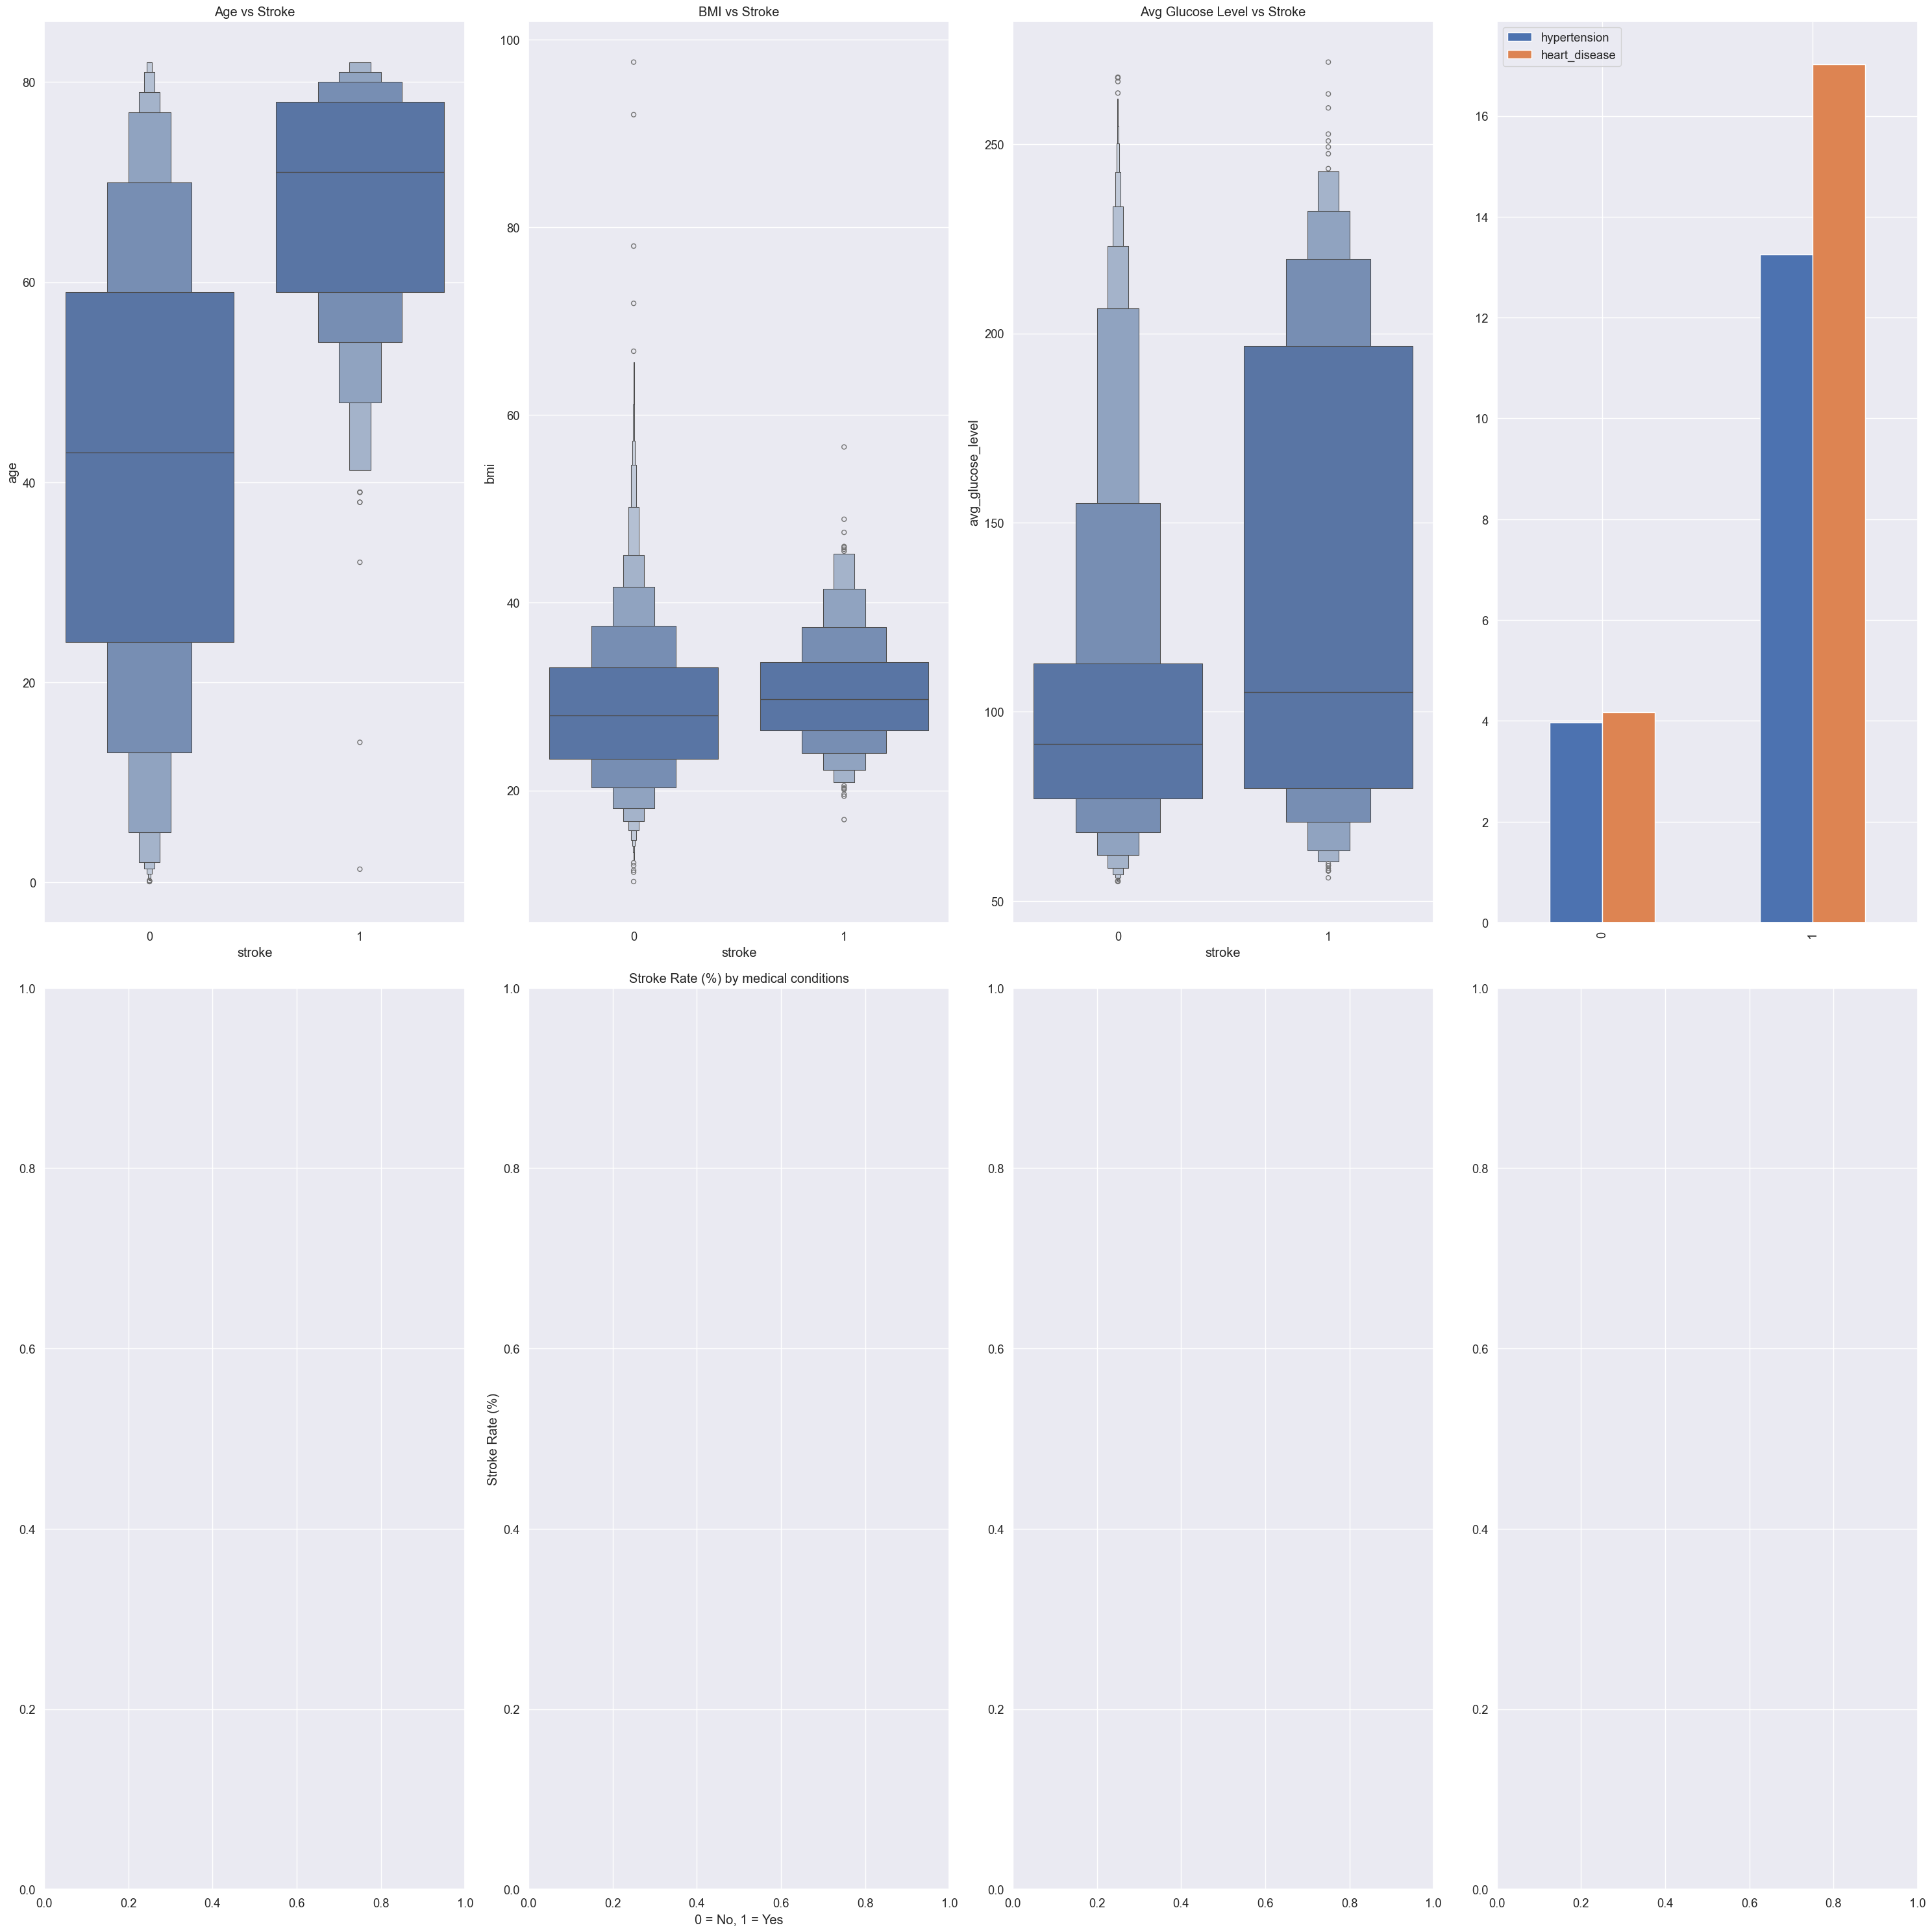

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(30, 30))

sns.boxenplot(x='stroke', y='age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age vs Stroke')

sns.boxenplot(x='stroke', y='bmi', data=df, ax=axes[0, 1])
axes[0, 1].set_title('BMI vs Stroke')

sns.boxenplot(x='stroke', y='avg_glucose_level', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Avg Glucose Level vs Stroke')


stroke_by_condition = pd.DataFrame({
    'hypertension': df.groupby('hypertension')['stroke'].mean(),
    'heart_disease': df.groupby('heart_disease')['stroke'].mean(),
}) * 100

stroke_by_condition.plot(kind='bar', ax=axes[0, 3])
axes[0, 3].set_title('Stroke Rate (%) by medical conditions')
axes[0, 3].set_ylabel('Stroke Rate (%)')
axes[0, 3].set_xlabel('0 = No, 1 = Yes')



plt.tight_layout()
plt.show()